# Hello HuggingFace

In [ ]:
!pip install -q transformers datasets diffusers

In [ ]:
import torch
from transformers import pipeline
from diffusers import DiffusionPipeline
from datasets import load_dataset
import soundfile as sf
from IPython.display import Audio

In [ ]:
# Sentiment Analysis
classifier = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english"
)
result = classifier('I am not super exited to be on the way to LLm mastery')

print(result)

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


[{'label': 'NEGATIVE', 'score': 0.9711841344833374}]


In [ ]:
# Name Entity Recognition
ner = pipeline(
    "ner",
    model="dbmdz/bert-large-cased-finetuned-conll03-english",
    grouped_entities=True,
    device=0   # GPU
)
result = ner('Barack Obama was the 44th president of the Unitied States')

print(result)

config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


[{'entity_group': 'PER', 'score': np.float32(0.9991614), 'word': 'Barack Obama', 'start': 0, 'end': 12}, {'entity_group': 'LOC', 'score': np.float32(0.46584398), 'word': 'Unit', 'start': 43, 'end': 47}, {'entity_group': 'ORG', 'score': np.float32(0.5319439), 'word': '##ied', 'start': 47, 'end': 50}, {'entity_group': 'LOC', 'score': np.float32(0.46452838), 'word': 'States', 'start': 51, 'end': 57}]


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/token_classification.py:186: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


In [ ]:
# Test Summarizatin
summarizer = pipeline(
    "summarization",
    model="sshleifer/distilbart-cnn-12-6",
    device='cuda'
)
text = '''
Kindly indicate the project ID or the client’s UIN in the remarks field.
For trips involving multiple clients, please ensure that the UINs or project IDs of all supported clients are clearly listed in the remarks.
'''
summary = summarizer(text, do_sample=False)

print(summary[0]['summary_text'])

Device set to use cuda
Your max_length is set to 142, but your input_length is only 52. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)


 Kindly indicate the project ID or the client’s UIN in the remarks field . For trips involving multiple clients, please ensure that the UINs or project IDs of all supported clients are clearly listed in the comments section of this article . For more information, please visit the remarks section .


In [ ]:
# Translation
translator = pipeline(
    'translation_en_to_fr',
    model='google-t5/t5-base',
    device='cuda'
)
result = translator('the data scientists were truely amazed by the power and simplicity of the HuggingFace')

print(result[0]['translation_text'])

Device set to use cuda


Les chercheurs en données ont été véritablement étonnés par la puissance et la simplicité de HuggingFace


In [ ]:
# Classification
classifier = pipeline(
    'zero-shot-classification',
    model='facebook/bart-large-mnli',
    device='cuda'
)
result = classifier("Hugging Face's Transformers libary is amazing!", candidate_labels=["technology", "sports", "politics"])

print(result)

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda


{'sequence': "Hugging Face's Transformers libary is amazing!", 'labels': ['technology', 'sports', 'politics'], 'scores': [0.9548969864845276, 0.026688499376177788, 0.018414529040455818]}


In [ ]:
# Text Generation
generator = pipeline(
    "text-generation",
    model="openai-community/gpt2",
    pad_token_id=50256,
    device="cuda"
)
result = generator("If there is one thing I want you to remember about HuggingFace, it's ")

print(result[0]["generated_text"])

Device set to use cuda


If there is one thing I want you to remember about HuggingFace, it's  your time, your money, your energy. When you are not working, and when you are working hard and pushing yourself to be more than a person, you will always be here for you, and you will always be with you.


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/681M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/1.73G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/909 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

Keyword arguments {'user_safetensors': True} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

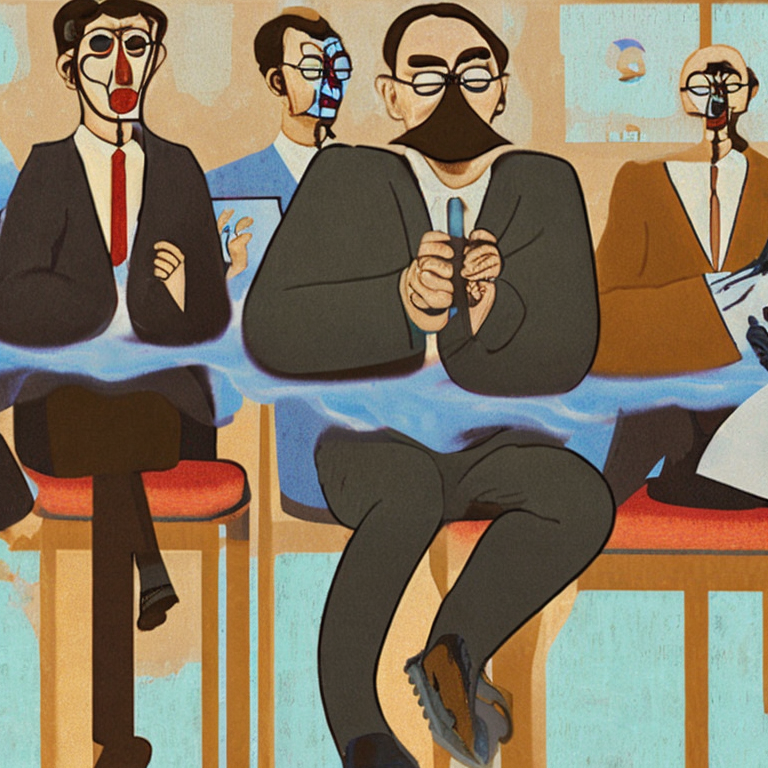

In [ ]:
# Image Geenration
image_gen = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2",
    torch_dtype=torch.float16,
    user_safetensors=True,
    variant="fp16"
).to("cuda")
text = "A class of Data Scientists learning about AI, in the surreal style of Salvador Dali"
image = image_gen(prompt=text).images[0]

image